# 3.4.1 Ridge Regression

Ridge regression shrinks the regression coefficients by imposing a penalty on their size. The ridge coefficients minimize a penalized residual sum of squares,

$$
\hat\beta^{\text{ridge}} = {\arg\min}_{\beta}\left\lbrace \sum_{i=1}^N\left( y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j \right)^2 +\lambda\sum_{j=1}^p \beta_j^2 \right\rbrace,
$$

An equivalent way to write the ridge problem is to make explicit the size constraint on the parameters, as

$$
\hat\beta^{\text{ridge}} = {\arg\min}_\beta \sum_{i=1}^N \left( y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j \right)^2 \text{     subject to } \sum_{j=1}^p \beta_j^2 \le t,
$$

## Scaling
The ridge solutions are not equivariant under scaling of the inputs, and so one normally standardizes the inputs before solving.

## Centering
Notice that the intercept $\beta_0$ has been left out of the penalty term. Penalization of the intercept would make the procedure depend on the origin chosen for $Y$; i.e., adding a constant $c$ to each of the targets $y_i$ (i.e. simply shifting) would not simply result in a shift of the predictions by the same constant $c$. <br>
It can be shown that the ridge solution can be separated into two parts, after reparametrization using centered inputs: Each $x_{ij}$ gets replaced by $x_{ij}-\bar{x}_j$.

1. We estimate $\beta_0$ by the mean response $\bar{y} = \frac{1}{N}\sum_1^N y_i$.
2. The remaining coefficients get estimated by a ridge regression without intercept, using centered $x_{ij}$. <br>

Henceforth we assume that this centering has been done, so that the input matrix $\mathbf{X}$ has $p$ columns rather than $p+1$.

## Matrix
$$
\text{RSS}(\lambda) = (\mathbf{y}-\mathbf{X}\beta)^T(\mathbf{y}-\mathbf{X}\beta) + \lambda\beta^T\beta
$$
The ridge regression solutions are easily seen to be

$$
\hat\beta^{\text{ridge}} = \left( \mathbf{X}^T\mathbf{X} + \lambda\mathbf{I} \right)^{-1}\mathbf{X}^T\mathbf{y},
$$
where $\mathbf{I}$ is the $p\times p$ identity matrix. Notice that the ridge solution is again a linear function of $\mathbf{y}$ by the choice of quadratic penalty $\beta^T\beta$, resulting in addition of a positive constant to the diagonal of $\mathbf{X}^T\mathbf{X}$ before inversion. This makes the problem nonsingular, even if $\mathbf{X}^T\mathbf{X}$ is not of full rank. It was actually the main motivation for ridge regression when it was first introduced in statistics (Hoerl and Kennard, 1970).

## From the Bayesian point of view
Ridge regression can also be derived as the mean or mode of a posterior distribution, with a suitably chosen prior distribution.

Suppose

$$\begin{align}
y_i \sim N(\beta_0+x_i^T\beta, \sigma^2) \\
\beta_j \sim \text{ i.i.d. }N(0, \tau^2)
\end{align}$$
Then the log-posterior density of $\beta$, with $\tau^2$ and $\sigma^2$ assumed known, is equal to the expression

$$
\sum_{i=1}^N\left( y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j \right)^2 +\frac{\sigma^2}{\tau^2}\sum_{j=1}^p \beta_j^2,
$$
which is the penalized residual sum of squares with $\lambda = \sigma^2/\tau^2$. Thus the ridge estimate is the mode of the posterior distribution; since the distribution is Gaussian, it is also the posterior mean. <br>

The variance/randomness brought by distributions are explained with ridge regression - which is actually named after the distribution density ridge.

## The singular value decomposition (SVD)
The SVD of the centered input matrix $\mathbf{X}$ gives us some additional insight into the nature of ridge regression. The SVD of the $N\times p$ matrix $\mathbf{X}$ has the form

$$
\mathbf{X} = \mathbf{UDV}^T,
$$
where

1. $\mathbf{U}$ is $N\times p$ orthogonal matrix, with the columns of $\mathbf{U}$ spanning the $\text{col}(\mathbf{X})$
2. $\mathbf{V}$ is $p\times p$ orthogonal matrix, with the columns of $\mathbf{V}$ spanning the $\text{row}(\mathbf{X})$
3. $\mathbf{D}$ is a $p\times p$ diagonal matrix, with diagonal entries
$d_1 \ge d_2 \ge \cdots \ge d_p \ge 0$ called the singular values of $\mathbf{X}$.
4. If one or more values $d_j = 0$, $\mathbf{X}$ is singular.

Using the SVD we can write the least squares fitted vector as

$$\begin{align}
\mathbf{X}\hat\beta^{\text{ls}} = \mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y} \\
= \mathbf{UU}^T\mathbf{y}.
\end{align}$$
Note

1. $\mathbf{U}^T\mathbf{y}$ are the coordinates of $\mathbf{y}$ w.r.t. the orthonormal basis $\mathbf{U}$.
2. the similarity with QR decomposition; $\mathbf{Q}$ and $\mathbf{U}$ are generally different orthogonal bases for $\text{col}(\mathbf{X})$.

**For ridge regression:** <br>

$$\begin{align}
\mathbf{X}\hat\beta^{\text{ridge}} = \mathbf{X}(\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})^{-1}\mathbf{X}^T\mathbf{y} \\
= \mathbf{UD}(\mathbf{D}^2 + \lambda\mathbf{I})^{-1}\mathbf{DU}^T\mathbf{y} \\
= \sum_{j=1}^p \mathbf{u}_j \frac{d_j^2}{d_j^2+\lambda}\mathbf{u}_j^T\mathbf{y},
\end{align}$$
where the $\mathbf{u}_j$ are the columns of $\mathbf{U}$. The ridge solution then shrinks these coordinates by the factors $d_j^2/(d_j^2+\lambda)$. This means that a greater amount of shrinkage is applied to the coordinates of basis vectors with smaller $d_j^2$. 

**To explain: use PCA:** <br>
The SVD of the centered matrix $\mathbf{X}$ is another way of expressing the principal components of the variables in $\mathbf{X}$. The sample covariance matrix is given by

$$
\mathbf{S} = \frac{1}{N}\mathbf{X}^T\mathbf{X},
$$
and via the SVD,

$$
\mathbf{X}^T\mathbf{X} = \mathbf{VD}^2\mathbf{V}^T,
$$
which is the eigen decomposition of $\mathbf{X}^T\mathbf{X}$ (and of $\mathbf{S}$, up to a factor $N$). The eigenvectors $v_j$ (columns of $\mathbf{V}$) are also called the principal components (or Karhunen-Loeve) directions of $\mathbf{X}$. The first principal component direction $v_1$ has the property that $\mathbf{z}_1 = \mathbf{X}v_1$ has the larger sample projected variance than any other direction. This sample variance is easily seen to be

$$
\text{Var}(\mathbf{z}_1) = \text{Var}(\mathbf{X}v_1) = \frac{d_1^2}{N},
$$

and in fact $\mathbf{z}_1 = \mathbf{X}v_1 = \mathbf{u}_1 d_1$. The derived variable $z_1$ is called the first principal component of $\mathbf{X}$, and hence $\mathbf{u}_1$ is the normalized first principal component. And subsequent principal components $z_j$ have maximum variance $d_j^2/N$, subject to being orthogonal to the earlier ones.

Hence the small singular values $d_j$ correspond to directions in the $\text{col}(\mathbf{X})$ having small variance, and ridge regression shrinks these directions the most. In simple words, it does not care what seems not worth. Recall that "The ridge solution then shrinks these coordinates by the factors $d_j^2/(d_j^2+\lambda)$".

## Effective degrees of freedom

$$\begin{align}
\text{df}(\lambda) = \text{tr}\left( \mathbf{X}(\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})^{-1}\mathbf{X}^T \right), \\
= \text{tr}(\mathbf{H}_\lambda) \\
= \sum_{j=1}^p \frac{d_j^2}{d_j^2+\lambda}.
\end{align}$$
<br>
This monotone decreasing function of $\lambda$ is the effective degrees of freedom of the ridge regression fit. Usually in a linear-regression fit, the degrees-of-freedom of the fit is $p$, the number of free parameters. The idea is that although all $p$ coefficients in a ridge fit will be non-zero, they are fit in a restricted fashion controlled by $\lambda$. Note that

$$\begin{align}
\text{df}(\lambda) = p \text{ when }\lambda = 0, \\
\text{df}(\lambda) \rightarrow 0 \text{ as }\lambda \rightarrow \infty.
\end{align}$$
<br>
Can understand as that the degree counters are shrinked by the rigde regression, each from 1 to $\frac{d_j^2}{d_j^2+\lambda}$

# Coefficients ~ Degree of Freedom

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("~/Statistical-Learning/data/prostate_cancer.csv")
data = data.drop('Unnamed: 0', axis = 1)

In [3]:
data_x = data.drop(['lpsa','train'], axis=1)
data_x_normalized = (data_x - data_x.mean())/data_x.std()
x_train = data_x_normalized[data.train=='T']
y_train = data[data.train=='T'].lpsa
x_train.shape

(67, 8)

Recall that the ridge regression solutions are

$$
\hat\beta^{\text{ridge}} = \left( \mathbf{X}^T\mathbf{X} + \lambda\mathbf{I} \right)^{-1}\mathbf{X}^T\mathbf{y},
$$

<br>
And, no interception term is needed for ridge regression because we centered it and estimate $\beta_0$ by the mean response $\bar{y} = \frac{1}{N}\sum_1^N y_i$.

In [40]:
def ridge(l, x_train, y_train):
    mat_x = x_train.values
#     mat_x = np.hstack((np.ones((len(x_train.values), 1)), x_train.values))
    mat_xt = np.transpose(mat_x)
    beta0 = np.mean(y_train)
    vec_y = y_train-beta0
    i = np.identity((mat_x.shape[1]))
    beta = np.matmul(np.linalg.inv(np.matmul(mat_xt, mat_x)+l*i), np.matmul(mat_xt, vec_y.values))
    beta = np.append(np.array([beta0]), beta)
    df = np.matrix.trace(np.matmul(mat_x, np.matmul(np.linalg.inv(np.matmul(mat_xt, mat_x)+l*i), mat_xt)))
    return beta, df

In [41]:
# Check if no ridge lambda=0
no_ridge_beta, df = ridge(0, x_train, y_train)
# original OLS:
mat_x = np.hstack((np.ones((len(x_train.values), 1)), x_train.values))
mat_xt = np.transpose(mat_x)
# Solve (X^T*X)b = X^T*y for b
ols_beta = np.linalg.solve(np.matmul(mat_xt, mat_x), np.matmul(mat_xt, y_train.values))
print(no_ridge_beta)
print(ols_beta)

[ 2.45234509  0.67912148  0.26265894 -0.1393084   0.20963901  0.30568635
 -0.29004888 -0.02432796  0.27027469]
[ 2.46493292  0.67952814  0.26305307 -0.14146483  0.21014656  0.3052006
 -0.28849277 -0.02130504  0.26695576]


In [26]:
df

9.000000000000002

In [28]:
np.mean(y_train)

2.4523450850746276

In [83]:
# Prepare
n=10000
df_list = np.zeros(n)
beta_dict = {}
for i in range(9):
    beta_dict[i] = np.zeros(n)
    
# Compute
for l in range(n):
    beta, df = ridge(l, x_train, y_train)
    df_list[l] = df
    for i in range(len(beta)):
        beta_dict[i][l] = beta[i]

In [84]:
beta_dict.pop(0)

array([2.45234509, 2.45234509, 2.45234509, ..., 2.45234509, 2.45234509,
       2.45234509])

In [85]:
df_list.shape

(10000,)

In [86]:
beta_arrays = np.array([array for array in beta_dict.values()])
np.transpose(beta_arrays).shape

(10000, 8)

In [87]:
import matplotlib.pyplot as plt

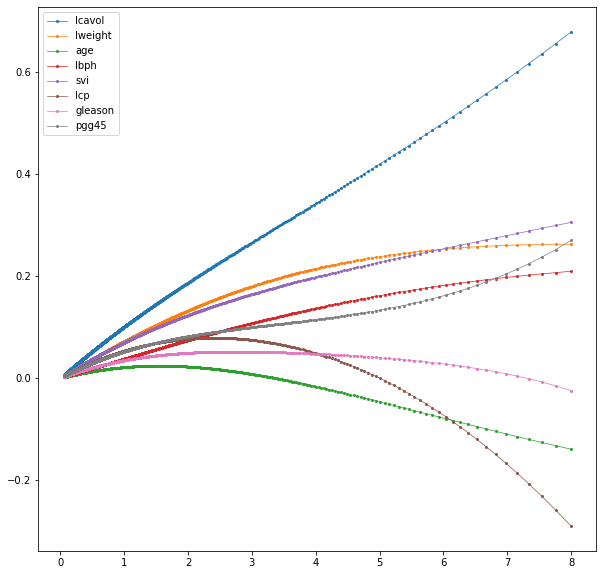

In [88]:
fig1 = plt.figure(figsize=(10,10))
fig1.clear()
ax = fig1.add_subplot(1,1,1)

# for i in range(8):
#     ax.plot(df_list, beta_dict[i+1], '-', color='blue', linewidth=0.3)

ax.plot(df_list, np.transpose(beta_arrays), 'o-', markersize=2, linewidth=0.7)
    
ax.legend(data_x.columns)
plt.show()

# Cross Validation to choose lambda

In [113]:
def ridge_n_fold_cv(n, x_train, y_train, l):
    cv_rss = []
    cv_df = 0
    m_rows = x_train.shape[0]
    for i in range(0, m_rows-int(m_rows/n), int(m_rows/n)):
#         print(i)
        x_cv_val = x_train.iloc[i:i+int(m_rows/n), :]
        x_cv_train = x_train.iloc[:i,:].append(x_train.iloc[i+int(m_rows/n):,:])
        y_cv_val = y_train.iloc[i:i+int(m_rows/n)]
        y_cv_train = y_train.iloc[:i].append(y_train.iloc[i+int(m_rows/n):])
#         print("val vs train:", (len(y_cv_val), len(y_cv_train)))
        ridge_beta, df = ridge(l, x_train, y_train)
        mat_x_val = np.hstack((np.ones((len(x_cv_val.values), 1)), x_cv_val.values))
#         y_cv_train_ols = np.matmul(mat_x, ols_beta)
#         print(y_cv_train_ols)
        y_cv_val_ols = np.matmul(mat_x_val, ridge_beta)
#         print(y_cv_val_ols)
        rss = sum((y_cv_val_ols - y_cv_val)**2)/len(y_cv_val)
#         print(rss)
        cv_rss.append(rss)
        cv_df = df
    return cv_rss, cv_df

In [121]:
def lambdas_from_edf(singular_squared:np.ndarray, interval:int) ->np.ndarray:
    """Given squared singular values of data matrix, calculate the lambdas
    with `interval` parameter to split unit intervals s.t. the resulting
    effective degrees of freedom are equidistant with 1/interval, via the
    Newton-Raphson method. e.g., if interval = 10, it produces lambdas for
    0, 0.5, 0.6, 0.7, ..."""
    p = singular_squared.size
    edfs = np.linspace(.5, p-.5, (p-1)*interval+1)
    threshold = 1e-3
    lambdas = []
    for edf in edfs:
        # Newton-Raphson
        lambda0 = (p-edf)/edf
        lambda1 = 1e6
        diff = lambda1 - lambda0
        while diff > threshold:
            num = (singular_squared/(singular_squared+lambda0)).sum()-edf
            denom = (singular_squared/((singular_squared+lambda0)**2)).sum()
            lambda1 = lambda0 + num/denom
            diff = lambda1 - lambda0
            lambda0 = lambda1
        lambdas.append(lambda1)
    lambdas.append(0)
    edfs = np.concatenate(([0], edfs, [p]))
    return edfs, np.array(lambdas)

In [123]:
import collections
import math

u, s, vh = np.linalg.svd(x_train, full_matrices=False)
s2 = s**2
edfs, lambdas = lambdas_from_edf(s2, 2)



In [124]:
edfs

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. ])

In [132]:
lambdas

array([984.73776979, 431.60222026, 251.33690478, 164.02428406,
       113.65356902,  81.55395221,  59.73465692,  44.21483859,
        32.79729534,  24.17643116,  17.53204767,  12.32591763,
         8.19214043,   4.87449052,   2.18888322,   0.        ])

In [133]:
cv_result_dict = {}
df_list = []
for i in range(len(lambdas)): 
    cv_mean_list = np.zeros(len(lambdas))
    cv_std_list = np.zeros(len(lambdas))

    cv_rss, cv_df = ridge_n_fold_cv(10, x_train, y_train, lambdas[i])
    cv_mean = np.mean(cv_rss)
    cv_std = np.std(cv_rss)
    cv_mean_list[i]=cv_mean
    cv_std_list[i]=cv_std
    
    df_list.append(cv_df)
    cv_result_dict[i] = [cv_mean, cv_std]

In [134]:
df_list

[0.4999999999999998,
 1.0000000000000016,
 1.4999999999999993,
 2.0000000000000298,
 2.4999999999999996,
 3.000000000055311,
 3.500000000000378,
 4.000000000000003,
 4.5,
 5.000000000049559,
 5.500000000000434,
 6.0000000000000036,
 6.5000000013097825,
 7.000000000003947,
 7.500000000000002,
 8.000000000000002]

In [135]:
cv_result_dict

{0: [1.067793589836454, 1.3870848135576426],
 1: [0.8907879423961245, 1.125693145824819],
 2: [0.7667259743012003, 0.9183241734649374],
 3: [0.6789814927790788, 0.7542413428344481],
 4: [0.615856976231167, 0.6246019241864744],
 5: [0.5694024003112536, 0.5224618785604451],
 6: [0.5343191968536355, 0.44252372547397684],
 7: [0.5071132831241655, 0.3807771344508271],
 8: [0.4855036009765941, 0.3341319070027609],
 9: [0.4680319853206952, 0.30010054619074716],
 10: [0.4538134341554756, 0.27656821543796906],
 11: [0.4423784322301854, 0.26167421587650086],
 12: [0.4335739338025467, 0.2537993377765956],
 13: [0.42750133612360325, 0.25161545273715197],
 14: [0.42447761814349066, 0.2541405470922236],
 15: [0.4250105794116788, 0.2607653521275454]}

In [136]:
cv_mean_result = np.array([x[0] for x in list(cv_result_dict.values())])
cv_std_result = np.array([x[1] for x in list(cv_result_dict.values())])
cv_ste_result = cv_std_result/np.sqrt(10)

In [137]:
cv_upper = cv_mean_result+cv_ste_result
cv_lower = cv_mean_result-cv_ste_result

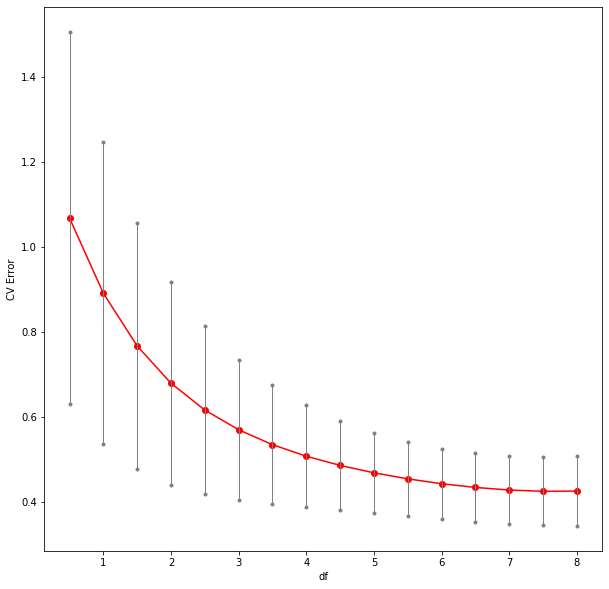

In [144]:
fig3 = plt.figure(figsize=(10,10))
fig3.clear()
ax = fig3.add_subplot(1,1,1)
ax.plot(df_list, cv_mean_result, 'o-', color='red')
for k in range(len(df_list)):
    ax.plot([df_list[k],df_list[k]], [cv_upper[k], cv_lower[k]], '.-', color='gray', linewidth=1)
# ax.plot([0,8], [one_standard_error_bound,one_standard_error_bound], '--', color='blue', alpha=0.3)
ax.set_xlabel("df")
ax.set_ylabel("CV Error")
plt.show()